# **LAPORAN PRAKTIKUM K-MEANS**
#### - Hafizh Hilman Asyhari
#### - Kelas D
#### - NIM : 202331206
#### - Prodi S1 Teknik Informatika
#### - Mata Kuliah : Pembelajaran Mesin (Machine Learning)
#### - Tahun 2024-2025

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

- numpy: Digunakan untuk komputasi numerik, seperti operasi matriks dan jarak Euclidean.
- pandas: Untuk membaca dan memproses dataset dalam format tabel (CSV).
- matplotlib.pyplot: Digunakan untuk membuat visualisasi hasil clustering

In [22]:
data = pd.read_csv('sales.csv')

- data = pd.read_csv('sales.csv') Akan membaca file CSV bernama sales.csv ke dalam objek DataFrame data menggunakan pandas.

In [25]:
print(data.head())

  Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2           P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.27   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0           0.22           0.28           0.39           0.50           0.00   
1           0.40           0.50           0.10           0.10           0.40   
2           1.00           0.18           0.18           0.36           0.45   
3           0.47           0.06           0.12           0.24           0.35   
4           0.53           0.27           0.60           0.20           0.20   

   Normalized 48  Normalized 49  Normalized 50  Normalized 51  
0         

In [40]:
print(data.columns)

Index(['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       ...
       'Normalized 42', 'Normalized 43', 'Normalized 44', 'Normalized 45',
       'Normalized 46', 'Normalized 47', 'Normalized 48', 'Normalized 49',
       'Normalized 50', 'Normalized 51'],
      dtype='object', length=107)


- Bakalan memastiin data terbaca dengan betul. Berdasarkan 5 baris pertama dari dataset

#### Mengambil Kolom Fitur dari Dataset dan Mengonversinya ke Numpy Array:

In [58]:
features = data[['W0', 'W1', 'W2', 'W3', 'W4']].to_numpy()

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

In [62]:
features = scaler.fit_transform(data[['W0', 'W1', 'W2', 'W3', 'W4']])

In [56]:
k = 3  # Jumlah cluster
max_iter = 100  # Iterasi maksimal

- k: Menentukan jumlah cluster yang ingin dibuat.
- max_iter: Batas iterasi untuk menghentikan algoritma jika tidak konvergen lebih awal.

### Inisialisasi Centroid

In [65]:
np.random.seed(42)
centroids = normalized_features[np.random.choice(normalized_features.shape[0], k, replace=False)]


- np.random.seed(42): Menentukan seed untuk hasil acak yang konsisten.
- np.random.choice: Memilih k titik data secara acak sebagai centroid awal dari dataset yang telah dinormalisasi.


### Iterasi K-Means

In [74]:
for _ in range(max_iter): 100

- Melakukan iterasi hingga jumlah maksimum iterasi tercapai atau hingga centroid tidak berubah.

In [76]:
distances = np.linalg.norm(normalized_features[:, np.newaxis] - centroids, axis=2)

- np.linalg.norm: Menghitung jarak Euclidean antara setiap titik data dan centroid.
- normalized_features[:, np.newaxis]: Menambahkan dimensi baru untuk memungkinkan operasi pengurangan dengan centroids.


### Menentukan Cluster Terdekat

In [83]:
clusters = np.argmin(distances, axis=1)

- np.argmin: Menentukan indeks cluster (centroid) terdekat berdasarkan jarak minimum.


#### Memperbarui Centroid

In [91]:
new_centroids = []
for c in range(k):
    if np.any(clusters == c):
        new_centroids.append(normalized_features[clusters == c].mean(axis=0))
    else:
        # Jika cluster kosong, gunakan centroid acak dari dataset
        new_centroids.append(normalized_features[np.random.randint(0, normalized_features.shape[0])])
new_centroids = np.array(new_centroids)


- new_centroids = []: Inisialisasi list kosong untuk menyimpan centroid baru.
- for c in range(k):: Melakukan iterasi sebanyak jumlah cluster (k).
- if np.any(clusters == c):: Mengecek apakah ada data yang masuk ke dalam cluster ke-c. Jika ada, centroid baru untuk cluster ini dihitung.
- normalized_features[clusters == c].mean(axis=0): Mengambil semua data yang tergabung dalam cluster c dan menghitung rata-rata untuk mendapatkan centroid baru.
- else:: Jika tidak ada data di cluster (cluster kosong), maka sebuah centroid acak dipilih dari dataset.
- new_centroids.append(normalized_features[np.random.randint(0, normalized_features.shape[0])]): Menambahkan centroid acak yang dipilih dari data ke dalam list new_centroids.
- new_centroids = np.array(new_centroids): Mengonversi list new_centroids menjadi array numpy.

In [93]:
assert np.all((clusters >= 0) & (clusters < k)), "Clusters array contains invalid values."


- assert np.all((clusters >= 0) & (clusters < k)): Memastikan bahwa semua nilai dalam array clusters adalah angka valid antara 0 dan k-1. Ini memastikan bahwa setiap data sudah terkelompok dalam cluster yang sah.
- "Clusters array contains invalid values.": Pesan error yang akan muncul jika nilai dalam clusters tidak valid.

#### Mencetak Centroid dan Penugasan Cluster:

In [104]:
print("Centroids:", centroids)
print("Cluster Assignment:", clusters)

Centroids: [[0.         0.         0.         0.         0.        ]
 [0.01851852 0.         0.01785714 0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
Cluster Assignment: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1

- print("Centroids:", centroids): Mencetak nilai centroid yang telah dihitung sebelumnya.
- print("Cluster Assignment:", clusters): Mencetak penugasan cluster, yaitu array yang menunjukkan cluster mana yang diterapkan pada setiap data.

#### Visualisasi Hasil K-Means:

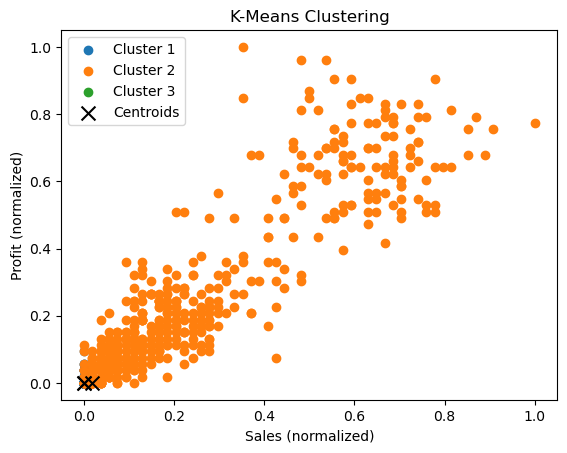

In [99]:
for cluster in range(k):
    plt.scatter(normalized_features[clusters == cluster, 0], normalized_features[clusters == cluster, 1], label=f'Cluster {cluster + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.xlabel('Sales (normalized)')
plt.ylabel('Profit (normalized)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


- for cluster in range(k):: Melakukan iterasi untuk setiap cluster yang ada.
- plt.scatter(normalized_features[clusters == cluster, 0], normalized_features[clusters == cluster, 1], label=f'Cluster {cluster + 1}'): Untuk setiap cluster, data yang tergabung dalam cluster tersebut dipetakan dan digambarkan sebagai titik pada grafik dengan warna yang berbeda.
- plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids'): Centroid untuk setiap cluster digambarkan sebagai titik hitam dengan marker "X" dan ukuran 100.
- plt.xlabel('Sales (normalized)'): Memberi label sumbu X sebagai 'Sales (normalized)'.
- plt.ylabel('Profit (normalized)'): Memberi label sumbu Y sebagai 'Profit (normalized)'.
- plt.title('K-Means Clustering'): Memberi judul pada grafik 'K-Means Clustering'.
- plt.legend(): Menampilkan legenda yang menunjukkan label untuk masing-masing cluster dan centroid.
- plt.show(): Menampilkan grafik.